# Freq. analysis

In [24]:
import numpy as np
import scipy.fft as fft
import matplotlib.pyplot as plt


# Create some noisy oscillations
dt = .001
t = np.arange(0, 50+dt, dt)
f = 3
s = 3 * np.cos(2*np.pi * f * t) + 10

s += np.random.normal(size=t.size)

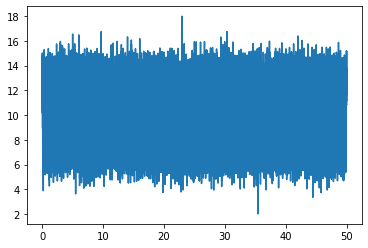

In [25]:
plt.figure()
plt.plot(t, s)

In [26]:
def power(s:np.ndarray, dt:float)->tuple:
    p = fft.rfft(s, norm="forward")
    p[0] = 0 # Removing DC
    p = 2 * np.abs(p) # Normalize by factor 2 to account for +freq and - freq
    freq = fft.rfftfreq(len(s), d=dt)
    
    peak_power, power_f, ratio = find_power_peak(p, freq)
    return p, freq, peak_power, power_f, ratio

(0.0, 10.0)

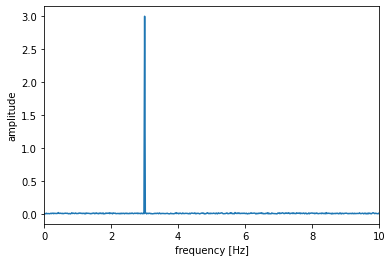

In [27]:
p = fft.rfft(s, norm="forward") * 2
p[0] = 0
freq = fft.rfftfreq(len(s), d=dt)
plt.figure()
plt.plot(freq, np.abs(p))
plt.ylabel("amplitude")
plt.xlabel("frequency [Hz]")
plt.xlim(0, 10)